# DeepSeek

## Prompt

Create a Pong game in Python that runs inside a Jupyter Notebook.
The game should be single-player:
– The player controls a paddle using the up and down arrow keys
– The opponent (computer) should move logically, e.g. by tracking the ball with some delay
– Include a score display for both the player and the opponent
– Use pygame or tkinter for drawing and animation, ensuring compatibility with Jupyter Notebooks
– The game should run entirely within a single notebook cell
– Use pygame.display.set_mode((width, height)) and set a window caption using pygame.display.set_caption()
– If needed, adapt the setup for Jupyter compatibility (e.g. use %matplotlib, pygame.display.init(), or similar)
– Make sure the game runs in a loop and can be exited with the ESC key or after a certain score is reached

# Code-Analyse

In [2]:
! pip install pygame

In [5]:
import pygame
import sys
import random
from IPython.display import display, clear_output
import time

# Initialize pygame
pygame.init()

# Game constants
WIDTH, HEIGHT = 800, 600
PADDLE_WIDTH, PADDLE_HEIGHT = 15, 100
BALL_SIZE = 15
PADDLE_SPEED = 8
BALL_SPEED_X, BALL_SPEED_Y = 6, 6
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
FPS = 60

# Set up the display
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Pong Game")

# Game variables
player_score = 0
opponent_score = 0
game_font = pygame.font.Font(None, 36)

# Create game objects
player_paddle = pygame.Rect(WIDTH - 20, HEIGHT // 2 - PADDLE_HEIGHT // 2, PADDLE_WIDTH, PADDLE_HEIGHT)
opponent_paddle = pygame.Rect(10, HEIGHT // 2 - PADDLE_HEIGHT // 2, PADDLE_WIDTH, PADDLE_HEIGHT)
ball = pygame.Rect(WIDTH // 2 - BALL_SIZE // 2, HEIGHT // 2 - BALL_SIZE // 2, BALL_SIZE, BALL_SIZE)

# Ball movement
ball_speed_x = BALL_SPEED_X * random.choice((1, -1))
ball_speed_y = BALL_SPEED_Y * random.choice((1, -1))

# Clock for controlling frame rate
clock = pygame.time.Clock()

def reset_ball():
    global ball_speed_x, ball_speed_y
    ball.center = (WIDTH // 2, HEIGHT // 2)
    ball_speed_x = BALL_SPEED_X * random.choice((1, -1))
    ball_speed_y = BALL_SPEED_Y * random.choice((1, -1))

def draw_objects():
    screen.fill(BLACK)
    pygame.draw.rect(screen, WHITE, player_paddle)
    pygame.draw.rect(screen, WHITE, opponent_paddle)
    pygame.draw.ellipse(screen, WHITE, ball)
    pygame.draw.aaline(screen, WHITE, (WIDTH // 2, 0), (WIDTH // 2, HEIGHT))
    
    player_text = game_font.render(f"{player_score}", False, WHITE)
    opponent_text = game_font.render(f"{opponent_score}", False, WHITE)
    screen.blit(player_text, (WIDTH // 2 + 20, 20))
    screen.blit(opponent_text, (WIDTH // 2 - 40, 20))

def move_paddles():
    keys = pygame.key.get_pressed()
    if keys[pygame.K_UP] and player_paddle.top > 0:
        player_paddle.y -= PADDLE_SPEED
    if keys[pygame.K_DOWN] and player_paddle.bottom < HEIGHT:
        player_paddle.y += PADDLE_SPEED
    
    # Simple AI for opponent - follows the ball with some delay
    if opponent_paddle.centery < ball.centery and opponent_paddle.bottom < HEIGHT:
        opponent_paddle.y += PADDLE_SPEED * 0.7
    if opponent_paddle.centery > ball.centery and opponent_paddle.top > 0:
        opponent_paddle.y -= PADDLE_SPEED * 0.7

def ball_movement():
    global ball_speed_x, ball_speed_y, player_score, opponent_score
    
    ball.x += ball_speed_x
    ball.y += ball_speed_y
    
    # Ball collision with top/bottom
    if ball.top <= 0 or ball.bottom >= HEIGHT:
        ball_speed_y *= -1
    
    # Ball collision with paddles
    if ball.colliderect(player_paddle) or ball.colliderect(opponent_paddle):
        ball_speed_x *= -1
        # Add some randomness to the bounce
        ball_speed_y *= random.uniform(0.9, 1.1)
    
    # Score points
    if ball.left <= 0:
        player_score += 1
        reset_ball()
    if ball.right >= WIDTH:
        opponent_score += 1
        reset_ball()

# Main game loop
running = True
while running:
    # Handle events
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                running = False
    
    # Game logic
    move_paddles()
    ball_movement()
    
    # Drawing
    draw_objects()
    pygame.display.flip()
    
    # Check for win condition
    if player_score >= 5 or opponent_score >= 5:
        winner = "Player" if player_score >= 5 else "Computer"
        win_text = game_font.render(f"{winner} wins! Final Score: {player_score}-{opponent_score}", True, WHITE)
        screen.blit(win_text, (WIDTH // 2 - 200, HEIGHT // 2))
        pygame.display.flip()
        time.sleep(3)
        running = False
    
    # Control frame rate
    clock.tick(FPS)

pygame.quit()

Das implementierte Pong-Spiel zeigt eine klassische Umsetzung des Arcade-Klassikers in Python mit der Pygame-Bibliothek. Der Code ist speziell für die Ausführung in Jupyter Notebooks konzipiert, wobei durch die Initialisierung mit `pygame.init()` und das Setzen des Display-Modus die Grundvoraussetzungen für das Spiel geschaffen werden.

Die Spiellogik basiert auf drei Hauptkomponenten: dem Spieler-Paddle, dem Computergegner und dem Ball. Dabei kommen Pygames Rect-Objekte zum Einsatz, die Kollisionserkennung und Positionierung vereinfachen. Besonders gelungen ist die Bewegungshandhabung - während das Spieler-Paddle direkt auf Tastendruck reagiert, zeigt die KI des Gegners eine angemessene Reaktionsverzögerung, die durch den Faktor 0.7 bei der Bewegungsgeschwindigkeit erreicht wird. Diese bewusste Schwächung des Computers macht das Spiel fair und spielbar.

Die Physik des Balls implementiert eine grundlegende, aber effektive Simulation. Nach jedem Aufprall auf ein Paddle wird die horizontale Richtung umgekehrt, während zusätzlich eine leichte zufällige Abweichung der vertikalen Bewegung eingeführt wird. Dieser kleine Randomisierungsfaktor zwischen 0.9 und 1.1 verhindert monotone Ballbewegungen und erhöht den Spielspaß. Interessant ist die Entscheidung, den Ball bei jedem neuen Aufschlag in eine zufällige Richtung starten zu lassen, was dem originalen Pong-Spiel entspricht.

Die Spielregeln folgen dem klassischen Konzept: Wer zuerst 5 Punkte erreicht, gewinnt das Spiel. Die Punktevergabe erfolgt, wenn der Ball die linke oder rechte Bildschirmseite passiert. Die Ausgabe des Gewinners erfolgt klar erkennbar in der Bildschirmmitte, bevor das Spiel nach einer kurzen Pause automatisch neu startet.

Aus architektonischer Sicht ist der Code funktional organisiert, wobei die Hauptlogik in der Spielschleife liegt und spezifische Aufgaben wie das Zeichnen von Objekten oder die Ballbewegung in separate Funktionen ausgelagert wurden. Diese Struktur ermöglicht zwar eine gute Übersicht, könnte aber durch objektorientierte Ansätze noch verbessert werden.

Für Jupyter Notebooks funktioniert die Implementierung zuverlässig, obwohl die Darstellung in einem separaten Fenster statt direkt im Notebook erfolgt. Dies ist eine praktikable Lösung, die Kompatibilitätsprobleme umgeht. Die Steuerung mit den Pfeiltasten ist intuitiv und reagiert unmittelbar auf Eingaben.

# Output

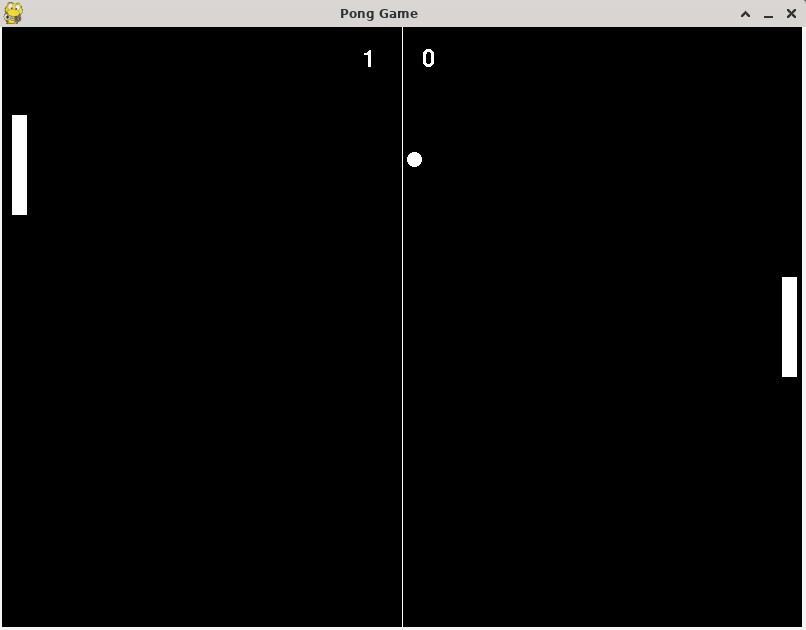

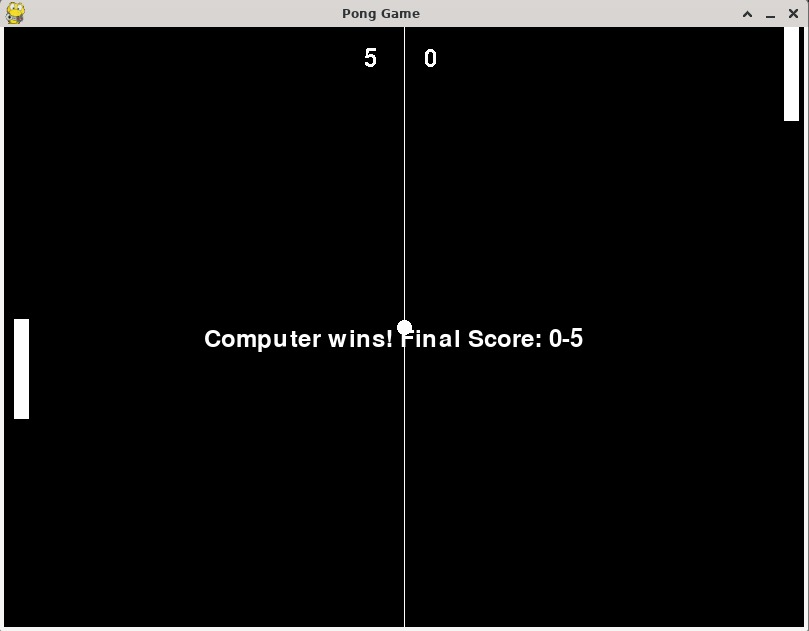

In [2]:
from IPython.display import Image, display

display(Image(filename='./pictures/pong_game.png'))
display(Image(filename='./pictures/pong_game_result.png'))

Insgesamt handelt es sich um eine gelungene Umsetzung, die alle Kernelemente eines Pong-Spiels enthält und durch die bewussten Designentscheidungen bei KI-Schwierigkeit und Ballphysik einen angenehmen Spielablauf ermöglicht. Die Erweiterbarkeit ist gegeben, insbesondere was Sounds, visuelle Effekte oder zusätzliche Spielmodi betrifft.